
### Vaibhav Kumar
### RollNo:19

### MULTIPLE LOGISTIC REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

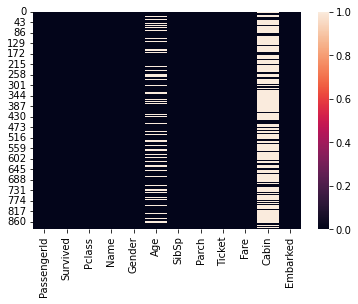

In [6]:
sns.heatmap(df.isnull())

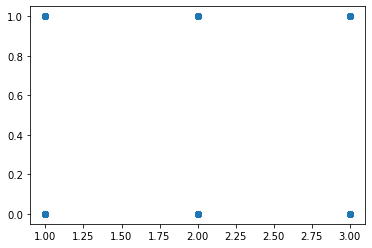

In [7]:
plt.scatter(df.Pclass,df.Survived)

In [8]:
percnan=pd.DataFrame([(col,df[col].isna().mean()*100) for col in df],columns=["Feature","Percentage"])
percnan

,Feature,Percentage
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Gender,0.000000
5,Age,19.865320
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.000000


**Age , Cabin and Emabrked contains Nan Values** 

**Age approx 20% Nan values and Embarked contains 0.22% of Nan so we can replace those Nan values with some values** 
*CABIN will be dropped*

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean()) ## fillna will replace the age nan values with mean


In [10]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df['Embarked']=df['Embarked'].fillna('S')

<AxesSubplot:>

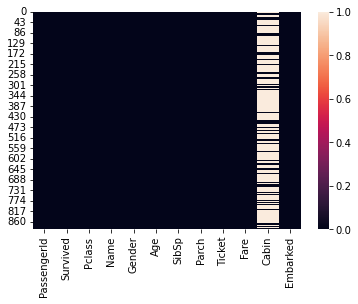

In [12]:
sns.heatmap(df.isnull())

**No Nan values in AGE and Embarked**

In [13]:
gd=pd.get_dummies(df['Gender'])

In [14]:
gd

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [15]:
emb=pd.get_dummies(df['Embarked'])

In [16]:
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [17]:
df=df.drop(['PassengerId','Name','Gender','Ticket','Embarked'],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,3,22.000000,1,0,7.2500,NaN
1,1,1,38.000000,1,0,71.2833,C85
2,1,3,26.000000,0,0,7.9250,NaN
3,1,1,35.000000,1,0,53.1000,C123
4,0,3,35.000000,0,0,8.0500,NaN
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,NaN
887,1,1,19.000000,0,0,30.0000,B42
888,0,3,29.699118,1,2,23.4500,NaN
889,1,1,26.000000,0,0,30.0000,C148


In [18]:
df=df.drop(['Cabin'],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [19]:
titanic=pd.concat([df,gd,emb],axis=1)

In [20]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [21]:

Y=titanic.Survived


In [22]:
X=titanic.drop(['Survived'],axis=1)

In [23]:
X

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [24]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### we need to standarized the values

In [25]:
from sklearn import preprocessing
#get col names first
names=X.columns
#create the Scalar Object
scaler=preprocessing.StandardScaler()
#fit your data on the scaler obj
scaled_df=scaler.fit_transform(X)
X=pd.DataFrame(scaled_df,columns=names)




In [26]:
X

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,0.000000,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


**80:20**

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=69)

In [28]:
model=LogisticRegression()
model.fit(X_train,y_train);

In [29]:
y_pred=model.predict(X_test)

In [30]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       112
           1       0.74      0.73      0.74        67

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [32]:
print(confusion_matrix(y_test,y_pred))

[[95 17]
 [18 49]]


**90:10**

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=69)

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train);

In [35]:
y_pred=model.predict(X_test)

In [36]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        59
           1       0.79      0.74      0.77        31

    accuracy                           0.84        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



In [38]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[53,  6],
       [ 8, 23]], dtype=int64)

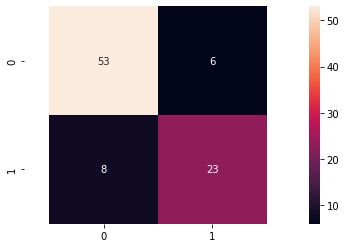

In [39]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 50 : 50 

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=69)

In [42]:
model=LogisticRegression()
model.fit(X_train,y_train);

In [43]:
y_pred=model.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       281
           1       0.77      0.70      0.74       165

    accuracy                           0.81       446
   macro avg       0.80      0.79      0.80       446
weighted avg       0.81      0.81      0.81       446



In [45]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[247,  34],
       [ 49, 116]], dtype=int64)

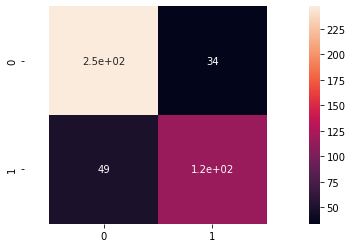

In [46]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 70:30

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=69)

In [48]:
model=LogisticRegression()
model.fit(X_train,y_train);

In [49]:
y_pred=model.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       168
           1       0.76      0.71      0.73       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268



In [51]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[145,  23],
       [ 29,  71]], dtype=int64)

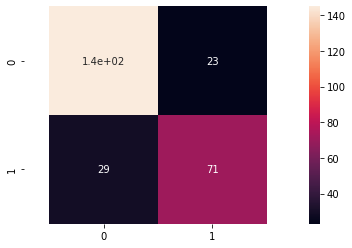

In [52]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

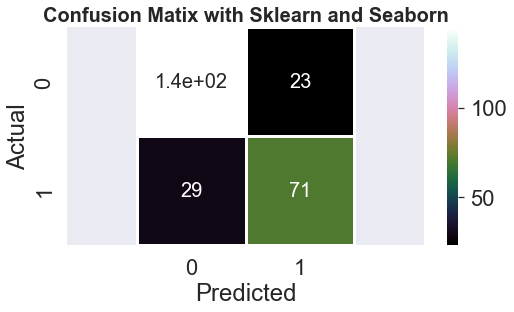

In [53]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,4))
    sns.set(font_scale=2)
    sns.heatmap(cf,annot=True,square=True,annot_kws={"size":20},linewidth=3,cmap='cubehelix')
    plt.xlabel('Predicted');
    plt.ylabel('Actual');
    plt.axis('Equal');
    plt.title('Confusion Matix with Sklearn and Seaborn',fontweight='bold',fontsize=20)
    plt.show()